<a href="https://colab.research.google.com/github/jackiekuen2/coursera-tensorflow/blob/master/Course_2_Week_4_Exercise_8_Kaggle_Sign_Language_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from tensorflow.keras.optimizers import Adam

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [ ]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [ ]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
      csv_reader = csv.reader(training_file, delimiter=',')
      first_line = True
      temp_images = []
      temp_labels = []
      
      for row in csv_reader:
        if first_line: # skip first line
          first_line = False
        else:
          temp_labels.append(row[0]) # label
          image_data = row[1:785] # pixel values
          image_data_as_array = np.array_split(image_data, 28) # turn 784 pixels into 28*28
          temp_images.append(image_data_as_array)
          
      images = np.array(temp_images).astype('float') # turn stings into floats
      labels = np.array(temp_labels).astype('float')
      # Your code ends here
    return images, labels

training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [ ]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')



validation_datagen = ImageDataGenerator(rescale=1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    # 1st layer: Convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2nd layer: Convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 3rd layer: Flatten to Fully-connected
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # 4th layer: Fully-connected output layer
    tf.keras.layers.Dense(26, activation='softmax')])

# Print out model summary
model.summary()

# Compile Model. 
model.compile(
    optimizer=Adam(lr=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Train the Model
history = model.fit_generator(
    train_datagen.flow(training_images, training_labels, batch_size=32),
    steps_per_epoch=len(training_images)/32,
    epochs=100,
    validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
    validation_steps=len(testing_images)/32,
    verbose=1)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               819712    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

[6.92426086682151, 0.56609035]

In [ ]:
model.save('kaggle_signlangMNIST_01.h5')

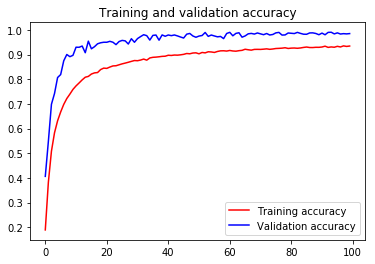

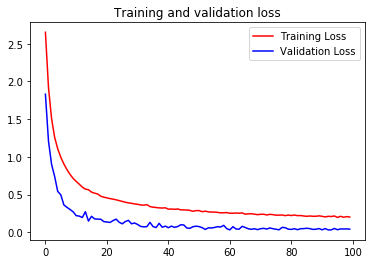

In [ ]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(28, 28), color_mode='grayscale')
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

/content/A (1).JPG
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Q


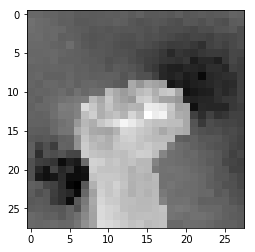

/content/F (1).JPG
[[0.000000e+00 0.000000e+00 6.395551e-22 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00]]
Q


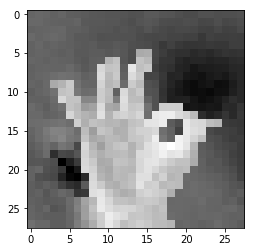

/content/I (1).JPG
[[0.000000e+00 0.000000e+00 8.902489e-34 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00]]
Q


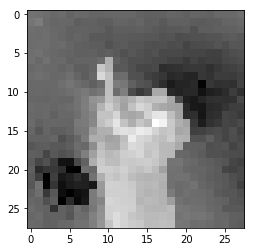

/content/R.JPG
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Q


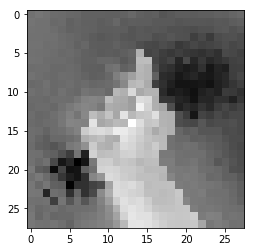

/content/U.JPG
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Q


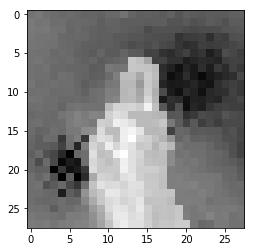

In [ ]:
test_images = [
    '/content/A (1).JPG',
    '/content/F (1).JPG',
    '/content/I (1).JPG',
    '/content/R.JPG',
    '/content/U.JPG']

for fn in test_images:
  path = fn
  img = image.load_img(path, target_size=(28, 28), color_mode='grayscale')

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = np.where(classes[0] == np.amax(classes[0]))
  print(fn)
#   print(x)
  print(classes)
  print(chr(int(result[0]) + 65))
  plt.imshow(img, cmap='binary')
  plt.show()